In [98]:
import PIL.Image as Image
from tqdm import tqdm
import os
import cv2
import numpy as np

In [54]:
PATH = "../data/afw"

pointers = {}

list_pointers = [x for x in os.listdir(PATH) if x.endswith('pts')]

for pointer in list_pointers:
    if((pointer[-6:] == '_1.pts') or (pointer[-6:] == '_2.pts')):
        pointers[str(pointer[:-6])] = {}

for pointer_name in tqdm(list_pointers):
    pointer_name_split = pointer_name.split('_')
    key = pointer_name_split[0]
    number = pointer_name_split[1].replace('.pts','')

    pointers[key][number] = f"{PATH}/{pointer_name}"

100%|██████████| 337/337 [00:00<00:00, 415851.85it/s]


In [55]:
count = 0
for key in pointers.keys():
    count += len(pointers[key])
print(f"Face quantity: {count}")

Face quantity: 337


In [121]:
landmark_pointer = []
with open(pointers['2519293956']['1'],'r') as infile:
    for _ in range(3):
        infile.readline()

    line = infile.readline().replace('\n','')
    while(line != '}'):
        landmark_pointer.append([int(float(x)) for x in line.split(" ")])
        line = infile.readline().replace('\n','')


In [122]:
img = Image.open(f'{PATH}/2519293956_1.jpg').convert("RGB")
img = np.array(img)

In [123]:
for i in landmark_pointer:
    if(i[0] > img.shape[0]):
        print("KRLH")
        break

    if(i[1] > img.shape[1]):
        print("KRLH")
        break

In [127]:
for i in range(len(landmark_pointer)):
    img = cv2.circle(
        img,
        (landmark_pointer[i][0],landmark_pointer[i][1]),
        3,(0, 0, 255),-1)
    

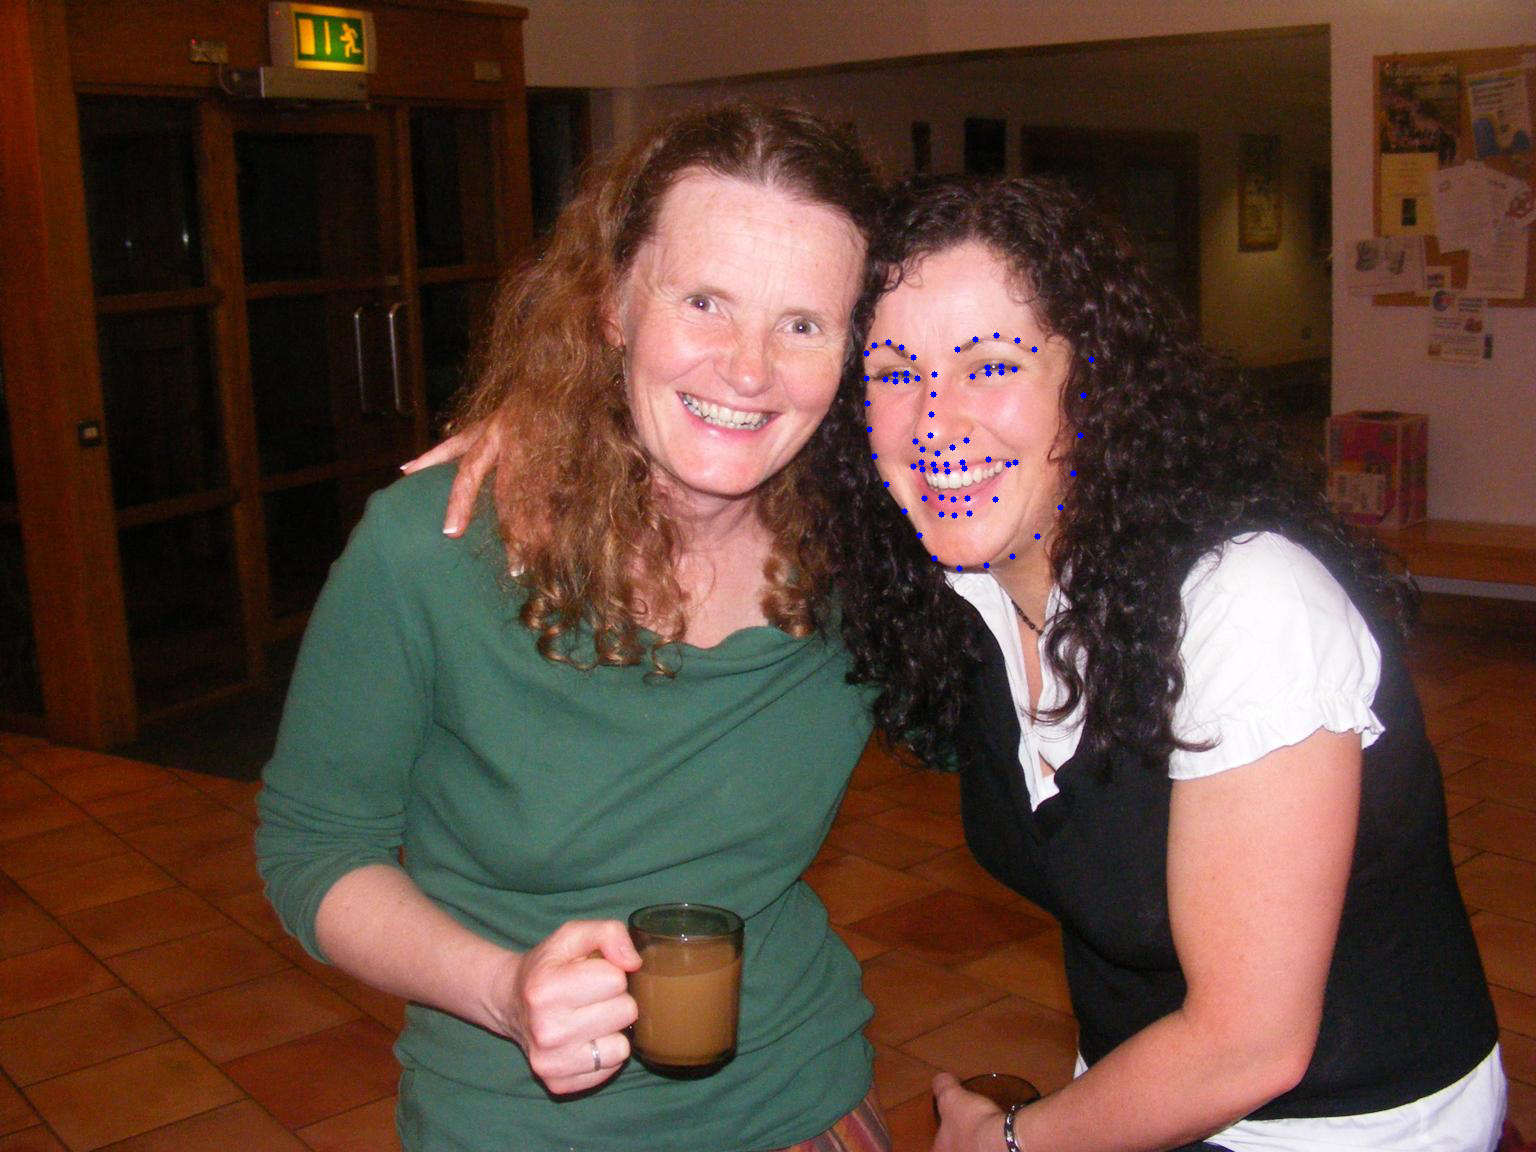

In [128]:
Image.fromarray(img)